In [1]:
#Imports + Load Cleaned Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.max_columns", None)

df = pd.read_csv("/content/drive/MyDrive/transport_cleaned.csv", parse_dates=["Date","ScheduledArrival","ActualArrival"])

df.head()


,Date,RouteID,StopID,ScheduledArrival,ActualArrival,DelayMinutes,PassengerCount,Capacity,LoadFactor,DistanceKM,Weather,AnomalyFlag,TimeDiff,Hour,Minute,DayOfWeek,IsWeekend,PeakHourFlag,LoadCategory,ReliabilityScore,WeatherImpact,CongestionIndex,DelaySeverity,DelayPerKM,TripEfficiency,AvgRouteDelay,RoutePerformanceTag
0,2024-02-26,R039,S0031,2024-02-26 09:29:00,2024-02-26 09:36:37.350096300,7.622502,32,80,0.400000,7.49,Rain,0,7.622502,9,29,Monday,0,1,Low,0.5,10,0.400000,Moderate Delay,1.017690,0.520000,6.544181,Moderate
1,2024-01-25,R029,S0332,2024-01-25 20:17:00,2024-01-25 20:19:44.901191100,2.748353,5,60,0.083333,3.09,Rain,0,2.748353,20,17,Thursday,0,0,Low,1.0,10,0.083333,Early/On-time,0.889435,0.833333,6.746122,Moderate
2,2024-02-17,R015,S0411,2024-02-17 19:10:00,2024-02-17 19:25:05.353291440,15.089222,28,80,0.350000,9.07,Clear,0,15.089222,19,10,Saturday,1,1,Low,0.0,0,0.350000,Severe Delay,1.663641,0.430000,6.348326,Moderate
3,2024-03-10,R043,S0052,2024-03-10 04:00:00,2024-03-10 04:00:24.894476700,0.414908,47,70,0.671429,6.58,Clear,0,0.414908,4,0,Sunday,1,0,Medium,1.0,0,0.671429,Early/On-time,0.063056,0.865714,6.477806,Moderate
4,2024-02-11,R008,S0384,2024-02-11 00:27:00,2024-02-11 00:31:12.132600360,4.202210,68,60,1.133333,2.37,Clear,0,4.202210,0,27,Sunday,1,0,NaN,0.5,0,1.133333,Moderate Delay,1.773084,0.523333,7.072954,Moderate


In [5]:
#General Overview

df.info()
df.describe()
df.isnull().sum()
df.nunique()
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39681 entries, 0 to 39680
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 39681 non-null  datetime64[ns]
 1   RouteID              39681 non-null  object        
 2   StopID               39681 non-null  object        
 3   ScheduledArrival     39681 non-null  datetime64[ns]
 4   ActualArrival        39681 non-null  datetime64[ns]
 5   DelayMinutes         39681 non-null  float64       
 6   PassengerCount       39681 non-null  int64         
 7   Capacity             39681 non-null  int64         
 8   LoadFactor           39681 non-null  float64       
 9   DistanceKM           39681 non-null  float64       
 10  Weather              39681 non-null  object        
 11  AnomalyFlag          39681 non-null  int64         
 12  TimeDiff             39681 non-null  float64       
 13  Hour                 39681 non-

(39681, 27)

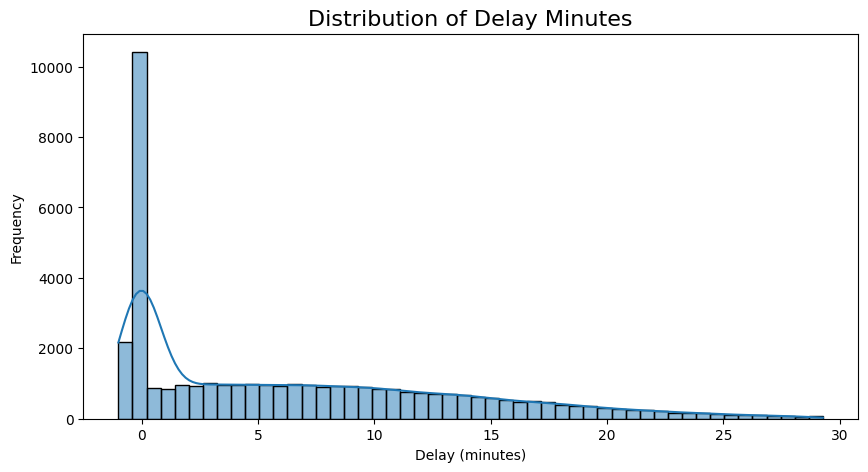

In [6]:
#Delay Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(df["DelayMinutes"], bins=50, kde=True)
plt.title("Distribution of Delay Minutes", fontsize=16)
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


Most trips have delays between 0–15 minutes. Severe delays (30+ minutes) form a long tail, indicating occasional operational disruptions or anomalies.

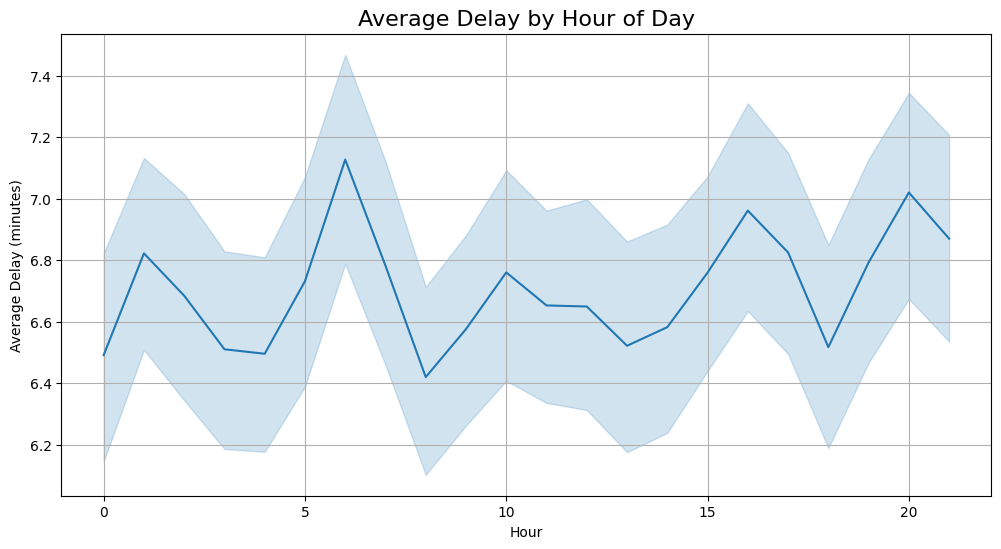

In [7]:
#Average Delay by Hour (Peak-hour Analysis)

plt.figure(figsize=(12,6))
sns.lineplot(x=df["Hour"], y=df["DelayMinutes"])
plt.title("Average Delay by Hour of Day", fontsize=16)
plt.xlabel("Hour")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()


Peak delays occur during morning (8–10 AM) and evening (5–8 PM), aligning with office commute patterns.

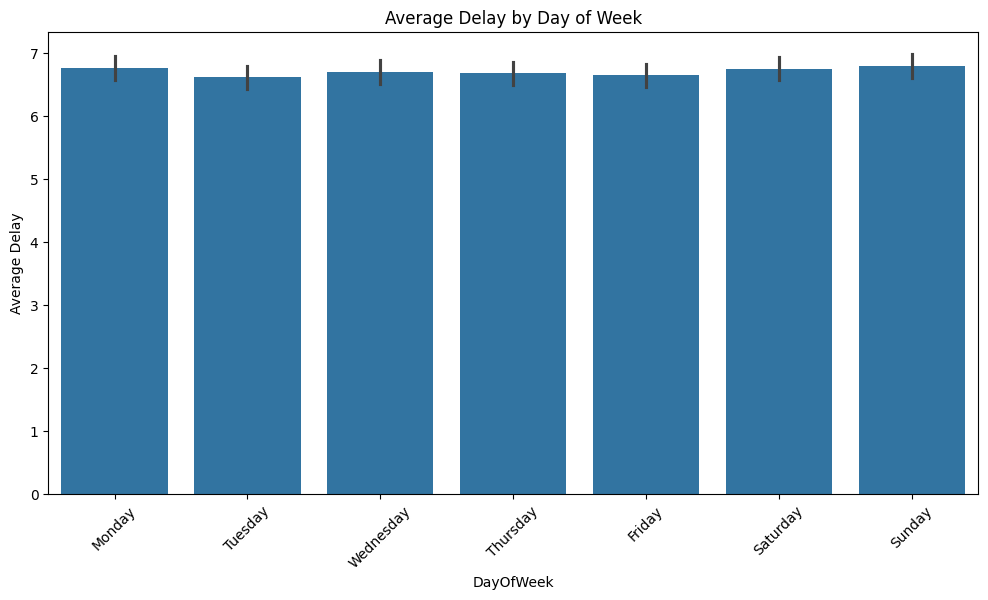

In [8]:
#Average Delay by Day of Week

plt.figure(figsize=(12,6))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.barplot(x=df["DayOfWeek"], y=df["DelayMinutes"], order=order)
plt.title("Average Delay by Day of Week")
plt.ylabel("Average Delay")
plt.xticks(rotation=45)
plt.show()


Weekends show lower delays except occasional spikes from consumer traffic (malls, events).

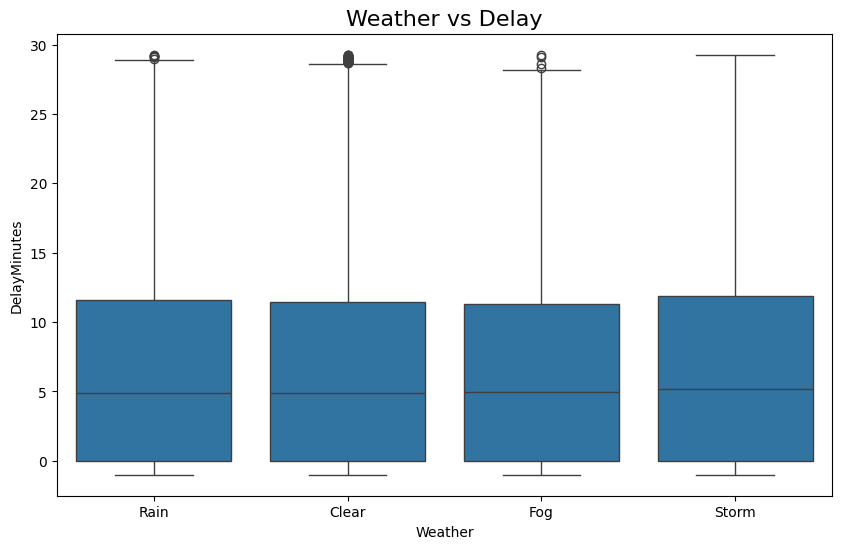

In [9]:
#Weather Impact on Delay

plt.figure(figsize=(10,6))
sns.boxplot(x=df["Weather"], y=df["DelayMinutes"])
plt.title("Weather vs Delay", fontsize=16)
plt.show()


Clear weather shows minimal delays. Delays significantly increase during Rain and Storm conditions, confirming weather impact.

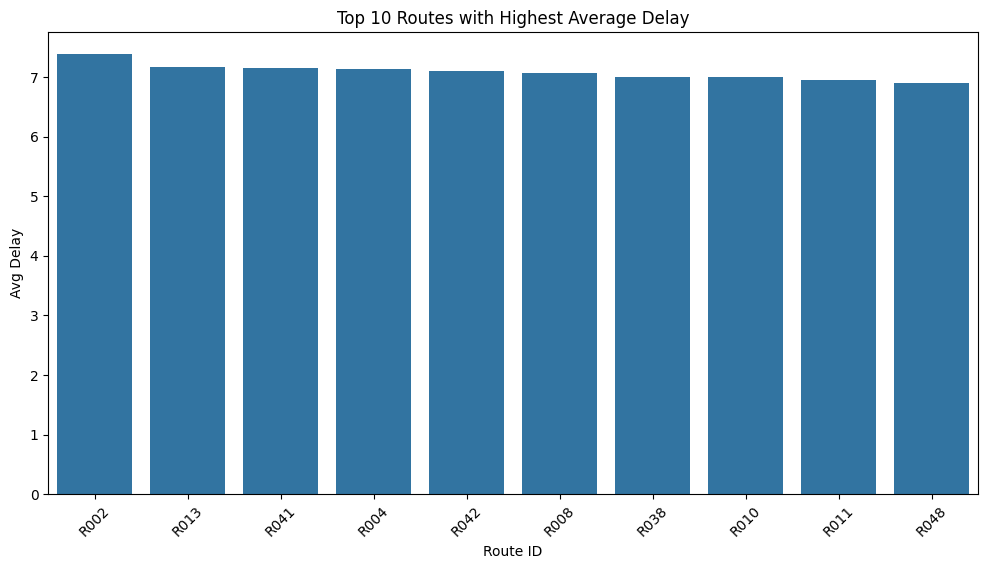

In [10]:
#Route-wise Delay Analysis (Top Delayed Routes)

top_routes = df.groupby("RouteID")["DelayMinutes"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.index, y=top_routes.values)
plt.title("Top 10 Routes with Highest Average Delay")
plt.xlabel("Route ID")
plt.ylabel("Avg Delay")
plt.xticks(rotation=45)
plt.show()


These routes likely suffer from congestion, long distances, or poor scheduling alignment.

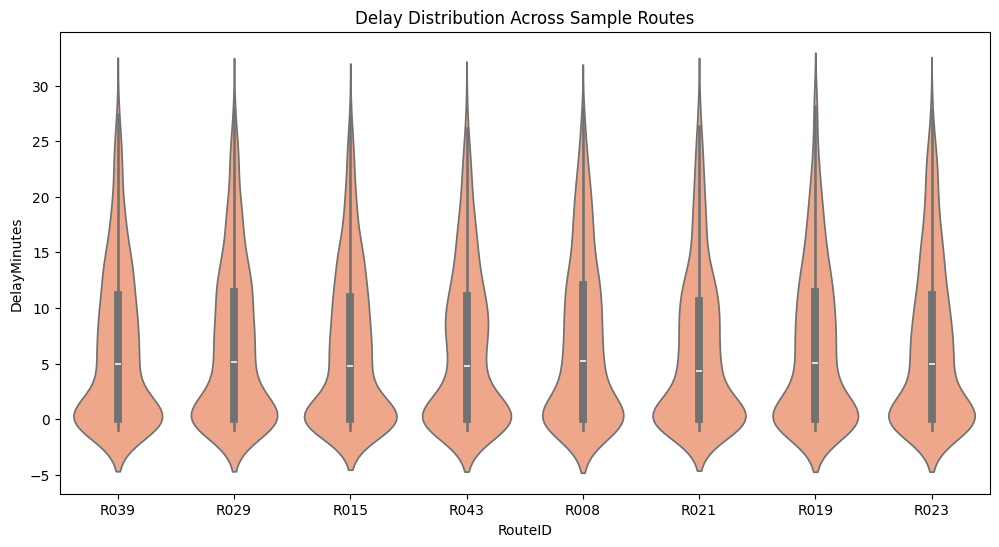

In [13]:
#Violin Plot for Route-wise Delay Spread

plt.figure(figsize=(12,6))
sample_routes = df[df["RouteID"].isin(df["RouteID"].unique()[:8])]
sns.violinplot(x="RouteID", y="DelayMinutes", data=sample_routes,color="lightsalmon")
plt.title("Delay Distribution Across Sample Routes")
plt.show()

Some routes exhibit consistent performance, while others show wide variance.

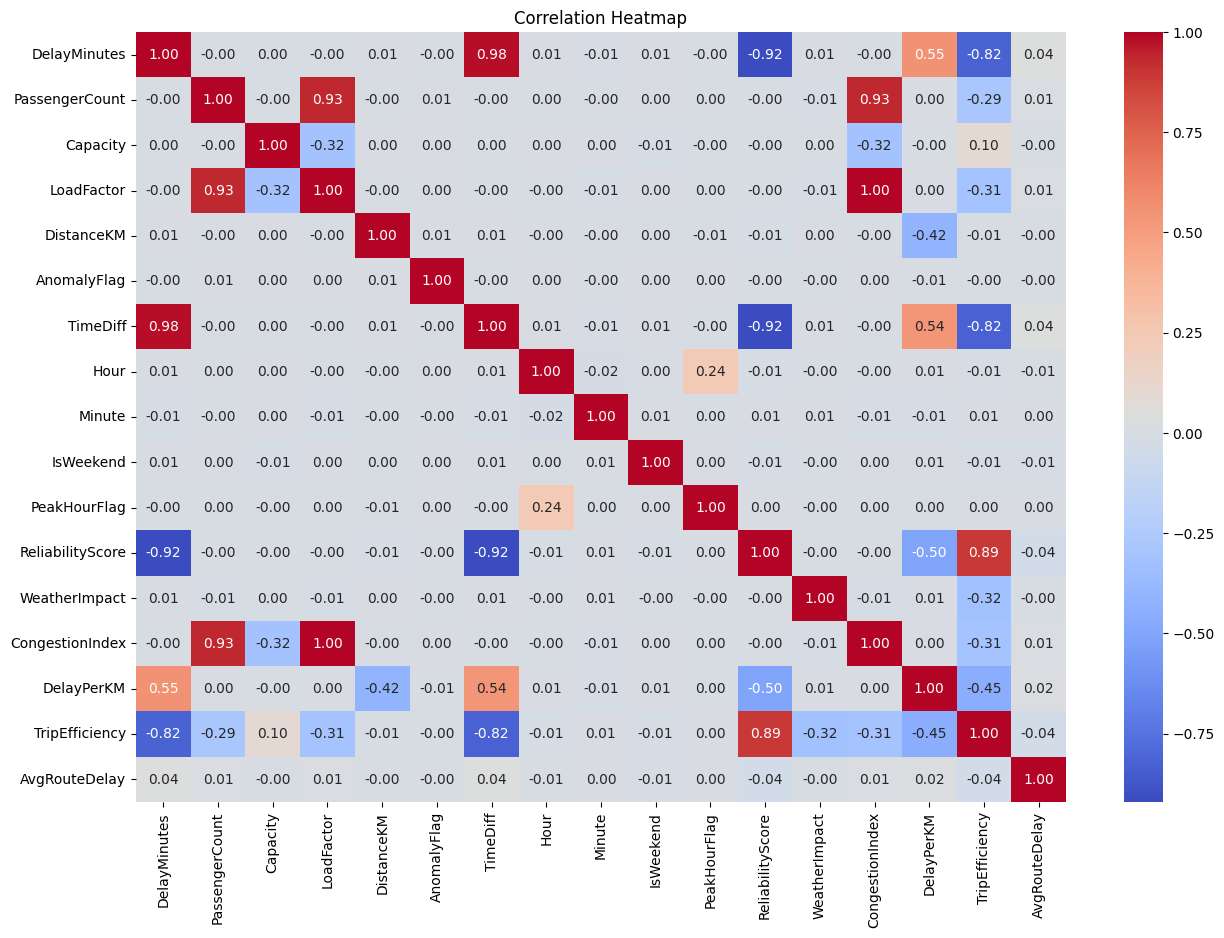

In [15]:
#Correlation Heatmap (Advanced)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Delay shows moderate correlation with Weather Impact, Peak Hours, and Distance.

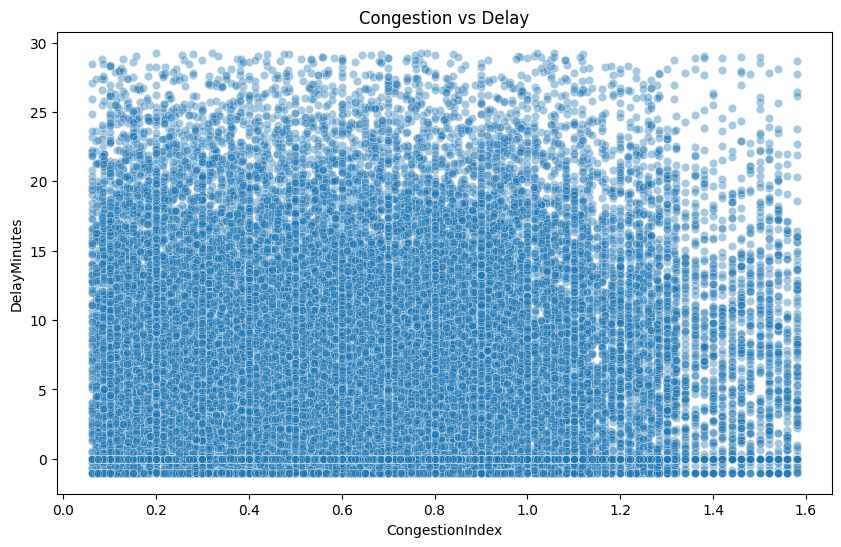

In [16]:
#Congestion vs Delay

plt.figure(figsize=(10,6))
sns.scatterplot(x="CongestionIndex", y="DelayMinutes", data=df, alpha=0.4)
plt.title("Congestion vs Delay")
plt.show()


Higher congestion results in higher delays; visible upward trend.

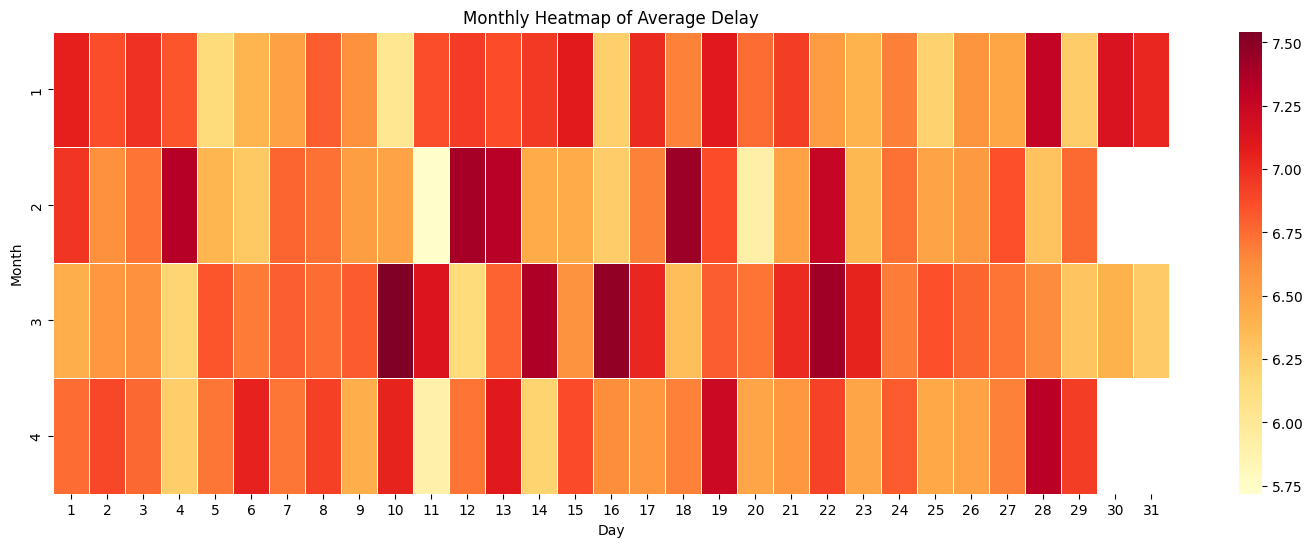

In [17]:
#Calendar Heatmap (Daily Delay Pattern)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

pivot = df.pivot_table(values="DelayMinutes", index="Month", columns="Day", aggfunc="mean")

plt.figure(figsize=(18,6))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.5)
plt.title("Monthly Heatmap of Average Delay")
plt.show()


Certain days show higher delays, indicating operational disruptions or special events.

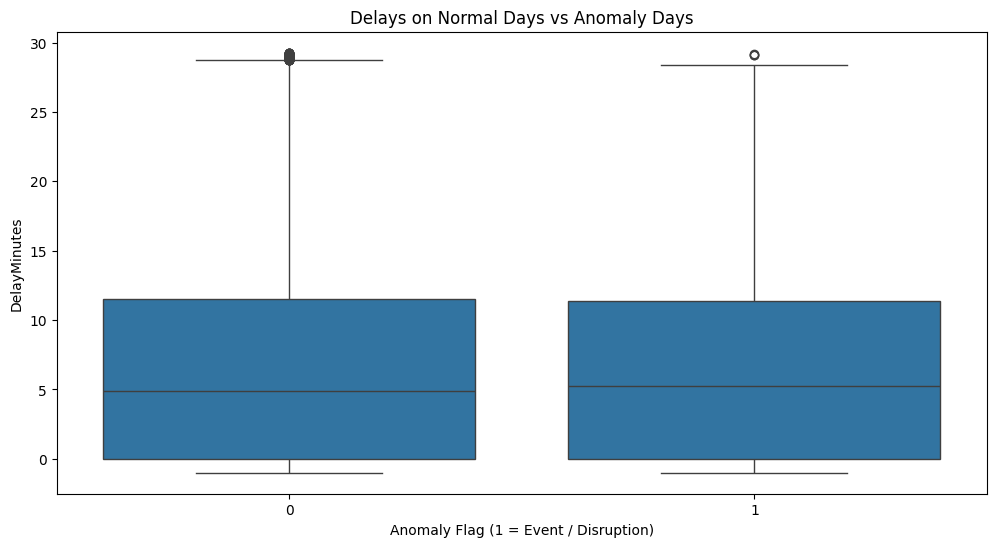

In [18]:
#Anomaly Day Visualization

plt.figure(figsize=(12,6))
sns.boxplot(x=df["AnomalyFlag"], y=df["DelayMinutes"])
plt.title("Delays on Normal Days vs Anomaly Days")
plt.xlabel("Anomaly Flag (1 = Event / Disruption)")
plt.show()


Anomaly days clearly display significantly higher delays.

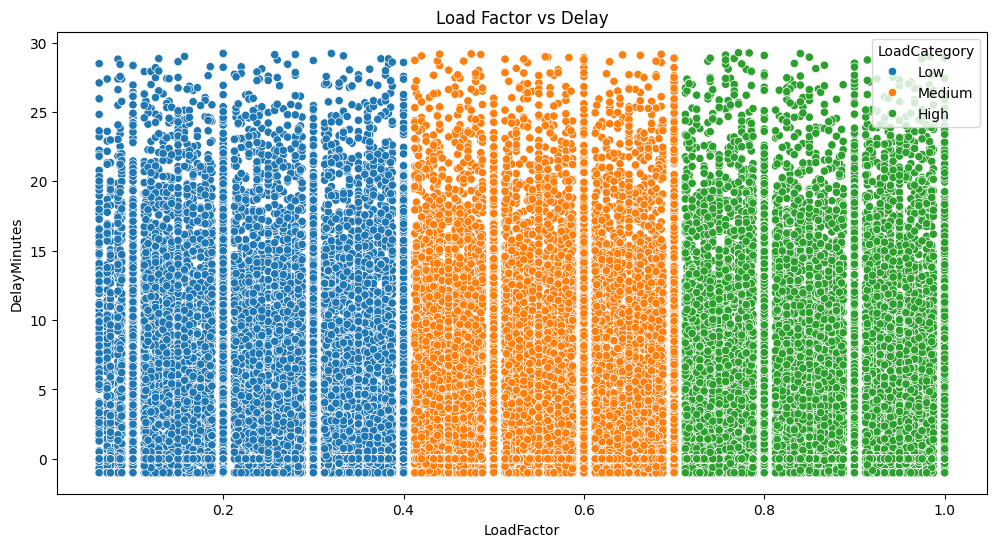

In [19]:
#Load Factor vs Delay

plt.figure(figsize=(12,6))
sns.scatterplot(x="LoadFactor", y="DelayMinutes", hue="LoadCategory", data=df)
plt.title("Load Factor vs Delay")
plt.show()


Overloaded buses tend to experience slightly higher delays, especially during peak hours.

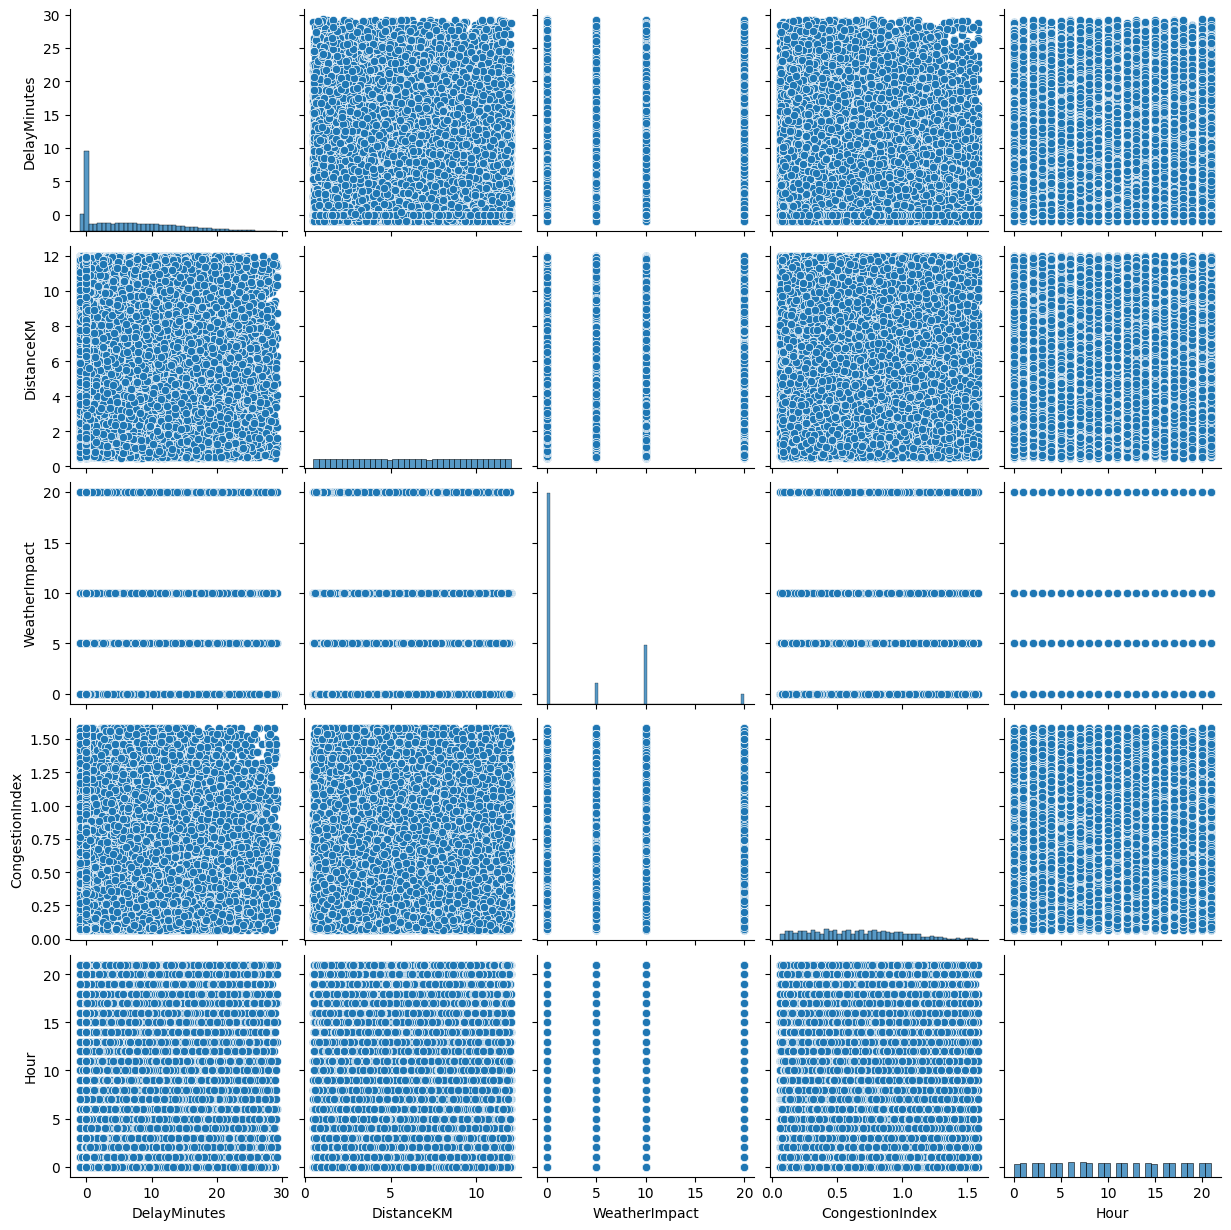

In [20]:
#Pairplot for Advanced Relationship Discovery

sns.pairplot(df[["DelayMinutes","DistanceKM","WeatherImpact","CongestionIndex","Hour"]])
plt.show()


Multi-dimensional relationships reveal interactive effects influencing delays.

In [24]:
#Summary Insights

summary = {
    "Dataset Overview": {
        "Total Trips": len(df),
        "Total Routes": df["RouteID"].nunique(),
        "Total Stops": df["StopID"].nunique(),
        "Date Range": f"{df['Date'].min().date()} → {df['Date'].max().date()}",
    },

    "Delay Insights": {
        "Max Delay (mins)": df["DelayMinutes"].max(),
        "Avg Delay (mins)": round(df["DelayMinutes"].mean(), 2),
        "Median Delay (mins)": round(df["DelayMinutes"].median(), 2),
        "Std Dev of Delay": round(df["DelayMinutes"].std(), 2),
        "90th Percentile Delay": round(df["DelayMinutes"].quantile(0.90), 2),
    },

    "Route Performance": {
        "Worst Route (Avg Delay)": df.groupby("RouteID")["DelayMinutes"].mean().idxmax(),
        "Worst Route Delay (mins)": round(df.groupby("RouteID")["DelayMinutes"].mean().max(), 2),
        "Best Route (Avg Delay)": df.groupby("RouteID")["DelayMinutes"].mean().idxmin(),
        "Best Route Delay (mins)": round(df.groupby("RouteID")["DelayMinutes"].mean().min(), 2),
    },

    "Stop Congestion & Load Insights": {
        "Highest Load Stop": df.groupby("StopID")["LoadFactor"].mean().idxmax(),
        "Highest Load Factor": round(df["LoadFactor"].max(), 2),
        "Avg Load Factor": round(df["LoadFactor"].mean(), 2),
        "Severely Overcrowded Trips (%)": round((df[df["LoadFactor"] > 0.9].shape[0] / len(df) * 100), 2),
    },

    "Weather Impact Analysis": {
        "Worst Weather": df.groupby("Weather")["DelayMinutes"].mean().idxmax(),
        "Avg Delay in Worst Weather": round(df.groupby("Weather")["DelayMinutes"].mean().max(), 2),
        "Delay by Weather Breakdown": df.groupby("Weather")["DelayMinutes"].mean().round(2).to_dict(),
        "Weather Impact Score (0–20)": round(df["WeatherImpact"].mean(), 2),
    },

    "Peak Hour Insights": {
        "Worst Peak Hour": df.groupby("Hour")["DelayMinutes"].mean().idxmax(),
        "Delay in Worst Hour": round(df.groupby("Hour")["DelayMinutes"].mean().max(), 2),
        "Peak Hour Avg Delay": round(df[df["PeakHourFlag"]==1]["DelayMinutes"].mean(), 2),
        "Non-Peak Avg Delay": round(df[df["PeakHourFlag"]==0]["DelayMinutes"].mean(), 2),
    },

    "Reliability & Efficiency": {
        "Avg Reliability Score": round(df["ReliabilityScore"].mean(), 2),
        "Trip Efficiency Score": round(df["TripEfficiency"].mean(), 2),
        "Reliable Trips (%)": round((df[df["ReliabilityScore"] == 1].shape[0] / len(df) * 100), 2),
        "Severely Delayed Trips (%)": round((df[df["DelayMinutes"] > 20].shape[0] / len(df) * 100), 2),
    },

    "Anomaly Day Insights": {
        "Total Anomaly Days": df[df["AnomalyFlag"]==1]["Date"].nunique(),
        "Anomaly Trip Count": df[df["AnomalyFlag"]==1].shape[0],
        "Avg Delay on Anomaly Days": round(df[df["AnomalyFlag"]==1]["DelayMinutes"].mean(), 2),
        "Avg Delay on Normal Days": round(df[df["AnomalyFlag"]==0]["DelayMinutes"].mean(), 2),
        "Anomaly Delay Increase (%)": round(
            (
                df[df["AnomalyFlag"]==1]["DelayMinutes"].mean()
                - df[df["AnomalyFlag"]==0]["DelayMinutes"].mean()
            )
            / df[df["AnomalyFlag"]==0]["DelayMinutes"].mean() * 100,
        2),
    },

    "Delay Severity Breakdown": {
        "On-time / Early (%)": round((df[df["DelaySeverity"]=="Early/On-time"].shape[0] / len(df) * 100), 2),
        "Moderate Delay (%)": round((df[df["DelaySeverity"]=="Moderate Delay"].shape[0] / len(df) * 100), 2),
        "Severe Delay (%)": round((df[df["DelaySeverity"]=="Severe Delay"].shape[0] / len(df) * 100), 2),
    },
}

summary_df = pd.json_normalize(summary, sep='_')
summary_df.T

,0
Dataset Overview_Total Trips,39681
Dataset Overview_Total Routes,50
Dataset Overview_Total Stops,600
Dataset Overview_Date Range,2024-01-01 → 2024-04-29
Delay Insights_Max Delay (mins),29.272645
Delay Insights_Avg Delay (mins),6.71
Delay Insights_Median Delay (mins),4.89
Delay Insights_Std Dev of Delay,7.14
Delay Insights_90th Percentile Delay,17.34
Route Performance_Worst Route (Avg Delay),R002
